[문제] 강남역 전철 출근시간(07~08) 승하차 인원 예측하기
- 패키지 로딩
- 데이터 로딩 및 확인 (결측치)
- 데이터 전처리
    >- 'Date'컬럼 삭제
    >- 'Type'컬럼 인코딩
    >- 'DoW'컬럼 인코딩
- 독립변수와 종속변수 분리
- 학습데이터와 평가데이터 분리
- 모델 생성 및 예측
- 모델 평가 (R2, MSE, RMSE)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [3]:
# 데이터 불러오기
df = pd.read_csv("GangnamTrainData.csv")
print(df.isna().sum())

df_train = pd.get_dummies(df['Type'])


Date       0
Type       0
DoW        0
05 ~ 06    0
06 ~ 07    0
07 ~ 08    0
08 ~ 09    0
09 ~ 10    0
10 ~ 11    0
11 ~ 12    0
12 ~ 13    0
13 ~ 14    0
14 ~ 15    0
15 ~ 16    0
16 ~ 17    0
17 ~ 18    0
18 ~ 19    0
19 ~ 20    0
20 ~ 21    0
21 ~ 22    0
22 ~ 23    0
23 ~ 24    0
00 ~ 01    0
01 ~ 02    0
dtype: int64


In [7]:
# 데이터 불러오기
df = pd.read_csv("GangnamTrainData.csv")
print(df.isna().sum())

# 'Date' 열 제거
df.drop('Date', axis=1, inplace=True)

# 'Type'을 원-핫 인코딩
df_train = pd.get_dummies(df['Type'])

# 'DoW'를 라벨링
week = np.sort(df['DoW'].unique())
df_train['DoW'] = df['DoW'].map({w: i for i, w in enumerate(week)})

# Feature와 Target 데이터 지정
x = df_train
y = df['07 ~ 08']  # 원본 데이터에서 타겟 값 가져오기

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 모델 정확도 평가
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# 예측 결과 출력
predictions = model.predict(X_test)
print("Predictions:", predictions)

# 추가 평가 지표 계산
r_square = model.score(X_test, y_test)
print(f'결정계수:{r_square:.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,predictions)):.2f}')
print(f'07-08시 평균 승하차 인원:{np.mean(y):.2f}')

Date       0
Type       0
DoW        0
05 ~ 06    0
06 ~ 07    0
07 ~ 08    0
08 ~ 09    0
09 ~ 10    0
10 ~ 11    0
11 ~ 12    0
12 ~ 13    0
13 ~ 14    0
14 ~ 15    0
15 ~ 16    0
16 ~ 17    0
17 ~ 18    0
18 ~ 19    0
19 ~ 20    0
20 ~ 21    0
21 ~ 22    0
22 ~ 23    0
23 ~ 24    0
00 ~ 01    0
01 ~ 02    0
dtype: int64
Model Accuracy: 0.8627087794998647
Predictions: [7556.11622441 2026.20812876 7399.58635055 1973.92396357 2089.5073124
 7171.04939111 1851.2461472  7399.58635055 1851.2461472  7556.11622441
 1938.40507095 2089.5073124  1938.40507095  824.6887379  1973.92396357
 2089.5073124  1938.40507095 1851.2461472  1973.92396357  824.6887379
 1973.92396357 1620.0774451  7774.51654793 2026.20812876  853.19275038
  853.19275038 2026.20812876 7774.51654793  853.19275038 2026.20812876
 1851.2461472  1938.40507095 7833.51112934 7399.58635055 7399.58635055
  593.91159772 1620.0774451  2026.20812876 7556.11622441  824.6887379
  853.19275038 7171.04939111  824.6887379   853.19275038 1620.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


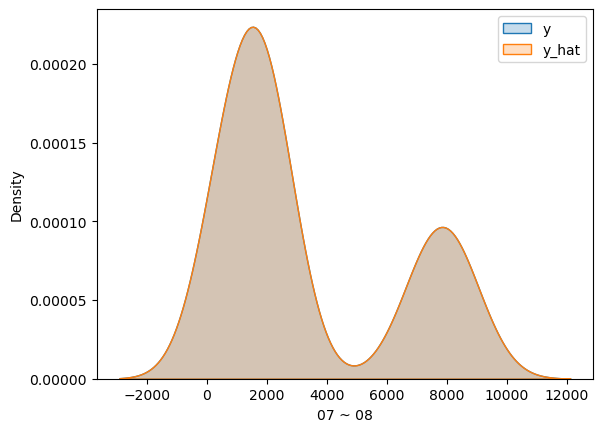

In [8]:
sns.kdeplot(x=y_test, fill=True, label='y')
sns.kdeplot(x=y_test, fill=True, label='y_hat')
plt.legend()
plt.show()